<a href="https://colab.research.google.com/github/shinobu9/Seminars-in-econometrics/blob/main/sem_5_15_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.stats as stat
from scipy import stats
import pmdarima as pm

import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

## Белый шум

Правда ли шум, который генерится в пакетах белый и можно ли использовать его без вреда для здоровья?

In [ ]:
np.random.seed(12345)
wn = np.random.standard_normal(201)

In [ ]:
print('Liliefors',
      'p-value = ', stat.diagnostic.lilliefors(wn, 'norm')[1])

print('Anderson-Darling', 
      'statistic =', stats.anderson(wn, 'norm').statistic,
      'critical value = ', stats.anderson(wn, 'norm').critical_values[2] )

print(stats.jarque_bera(wn))

Liliefors p-value =  0.5149190943701044
Anderson-Darling statistic = 0.2161589748754409 critical value =  0.772
SignificanceResult(statistic=0.37209499171842647, pvalue=0.8302341613606312)


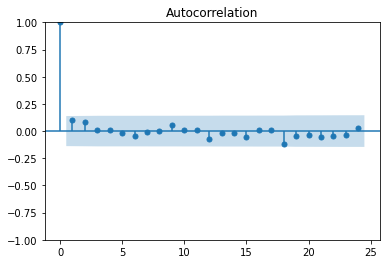

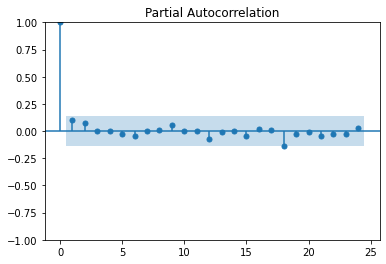

In [ ]:
sm.graphics.tsa.plot_acf(wn)
sm.graphics.tsa.plot_pacf(wn, method = 'ywm')
plt.show()

In [ ]:
np.mean(wn[:-1])

-0.000984298097863523

Ниже я проверяю, получается ли фиксировать белый шум при автоматической генерации ARMA моделей

In [ ]:
nsimulations = 200
empty_dataset = np.zeros(nsimulations)
np.random.seed(12345)

measurement_shocks = np.zeros(nsimulations)

mod = sm.tsa.SARIMAX(empty_dataset, order=(0, 0, 0), trend='n')
siml = mod.simulate([1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

np.mean(siml)

-0.000984298097863523

Если бы нам было все равно, какие шоки из стандартного нормального распрдеделения генерятся, использовали бы код ниже, обратите внимание на разницу

In [ ]:
#nsimulations = 100
#empty_dataset = np.zeros(nsimulations)

# y_t =  1*eps_t
#mod = sm.tsa.SARIMAX(empty_dataset, order=(0, 0, 0), trend='n')
#siml = mod.simulate([1**2], nsimulations)

## Задача 13

Моделирование стационарных процессов из задачи 11. Мат ожидание, дисперсия, коррелограммы.

https://www.statsmodels.org/devel/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [ ]:
np.random.seed(12345)
empty_dataset = np.zeros(nsimulations)
mod = sm.tsa.SARIMAX(empty_dataset, order=(1, 0, 0), trend='c')
ar_1 = mod.simulate([1, -0.5, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

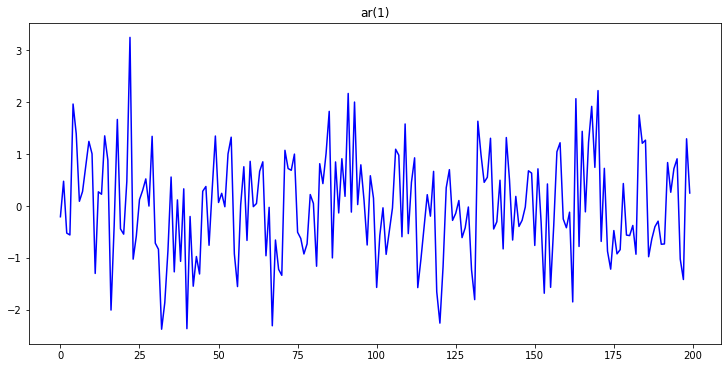

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

ax.set(title='ar(1)')
ax.plot(siml,'b-')

plt.show()

In [ ]:
print(np.mean(ar_1), np.var(ar_1))

0.6649195445357121 1.2533657245258416


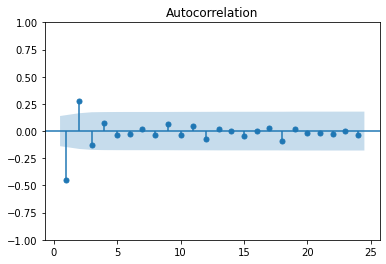

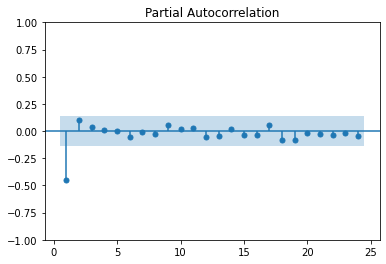

In [ ]:
sm.graphics.tsa.plot_acf(ar_1, zero = False)
sm.graphics.tsa.plot_pacf(ar_1, method = 'ywm', zero = False)
plt.show()

In [ ]:
np.random.seed(12345)
empty_dataset = np.zeros(nsimulations)
mod = sm.tsa.SARIMAX(empty_dataset, order=(2, 0, 0), trend='c')
ar_2 = mod.simulate([1, 0.1, 0.2, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

In [ ]:
print(np.mean(ar_2), np.var(ar_2))

1.4291864423647196 1.126337540932125


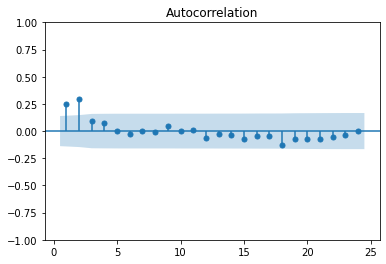

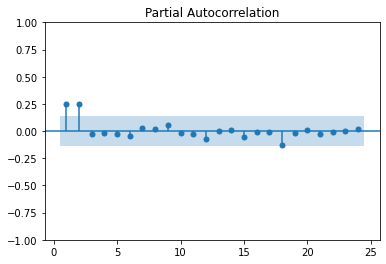

In [ ]:
sm.graphics.tsa.plot_acf(ar_2, zero = False)
sm.graphics.tsa.plot_pacf(ar_2, method = 'ywm', zero = False)
plt.show()

In [ ]:
ar = np.array([1, -0.1, -0.2])
ma = np.array([1])
print(tsa.arima_process.arma_acf(ar, ma, 3))
print(tsa.arima_process.arma_pacf(ar, ma, 3))

[1.     0.125  0.2125]
[1.    0.125 0.2  ]


## Задача 14

Коррелограмма ARMA процесса

(сделать дома по аналогии с ар и ма, мат ождание, дисперсию, акф, пакф)

In [ ]:
np.random.seed(12345)
mod = sm.tsa.SARIMAX(empty_dataset, order=(1, 0, 1), trend='c')
arma_11 = mod.simulate([1, 0.4, -0.8, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

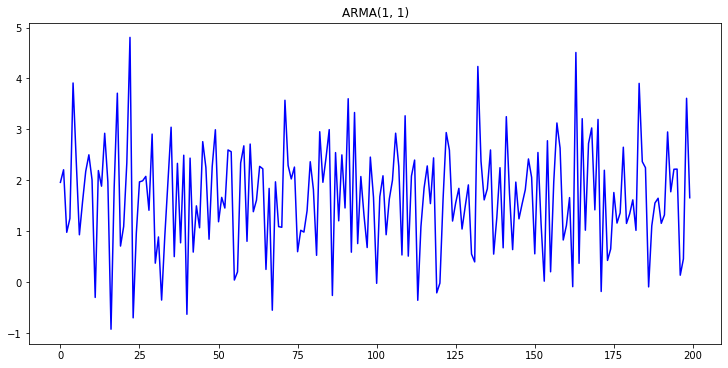

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

ax.set(title='ARMA(1, 1)')
ax.plot(arma_11,'b-')

plt.show()

In [ ]:
print(np.mean(arma_11), np.var(arma_11))

1.6703786766147763 1.107173466961131


In [ ]:
ar = np.array([1, -0.4])
ma = np.array([1, -0.8])
print(tsa.arima_process.arma_acf(ar, ma, 10))
print(tsa.arima_process.arma_pacf(ar, ma, 10))

[ 1.0000000e+00 -2.7200000e-01 -1.0880000e-01 -4.3520000e-02
 -1.7408000e-02 -6.9632000e-03 -2.7852800e-03 -1.1141120e-03
 -4.4564480e-04 -1.7825792e-04]
[ 1.         -0.272      -0.19738752 -0.14904926 -0.11510572 -0.09008585
 -0.07108125 -0.05637071 -0.04484707 -0.03575107]


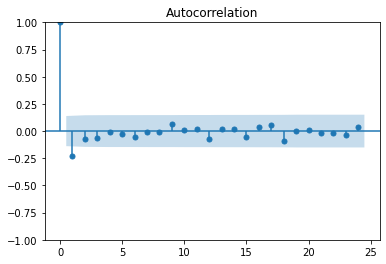

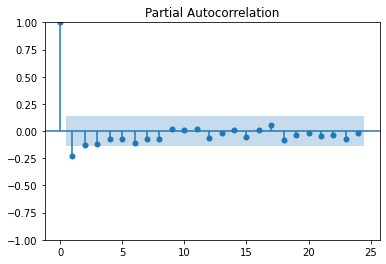

In [ ]:
sm.graphics.tsa.plot_acf(arma_11)
sm.graphics.tsa.plot_pacf(arma_11, method = 'ywm')
plt.show()

## Задача 15

Построение реализаций смешанного процесса авторегрессии – скользящего среднего. Проблема общих множителей (common factor model).

Постройте реализации процессов:

In [ ]:
np.random.seed(12345)

mod_1 = sm.tsa.SARIMAX(empty_dataset, order=(2, 0, 2), trend='n')
arma_22 = mod_1.simulate([1.3, -0.4, -0.3, -0.4, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:], initial_state = [0, 0, 0])

mod_2 = sm.tsa.SARIMAX(empty_dataset, order=(1, 0, 1), trend='n')
arma_11 = mod_2.simulate([0.5, 0.5, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:], initial_state = [0, 0])

Сравните полученные реализации процессов  и объясните результаты этого сравнения.

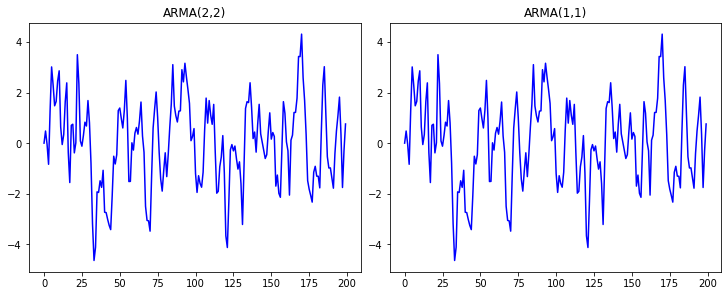

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4), constrained_layout=True)

ax1.set(title='ARMA(2,2)')
ax1.plot(arma_22,'b-')

ax2.set(title='ARMA(1,1)')
ax2.plot(arma_11, 'b-')

plt.show()

Оцените коэффициенты модели ARMA(2,2) по данным arma_22

In [ ]:
mod_1 = sm.tsa.statespace.SARIMAX(arma_22, trend='n', order=(2,0,2))
res_1 = mod_1.fit(disp = False)
print(res_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -281.150
Date:                Wed, 15 Mar 2023   AIC                            572.300
Time:                        11:48:13   BIC                            588.791
Sample:                             0   HQIC                           578.974
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5934      0.063     25.119      0.000       1.469       1.718
ar.L2         -0.6160      0.064     -9.568      0.000      -0.742      -0.490
ma.L1         -0.5360      3.270     -0.164      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
mod_2 = sm.tsa.statespace.SARIMAX(arma_22, trend='n', order=(1,0,1))
res_2 = mod_2.fit(disp = False)
print(res_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -283.325
Date:                Wed, 15 Mar 2023   AIC                            572.649
Time:                        11:50:16   BIC                            582.544
Sample:                             0   HQIC                           576.654
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5998      0.064      9.428      0.000       0.475       0.725
ma.L1          0.4807      0.074      6.540      0.000       0.337       0.625
sigma2         0.9893      0.103      9.635      0.0

## Задача 16

Подбор стационарной модели ARMA для ряда наблюдений c выраженной сезонностью.

Для квартальных данных чисто сезонными являются стационарные модели  сезонной авторегрессии первого порядка (SAR(1) – first order seasonal autoregression)

$X_t = a_4 X_{t-4} + ε_t, |a_4| < 1, $

и сезонного скользящего среднего первого порядка (SMA(1) – first order seasonal moving average)

$X_t = ε_t + b_4 ε_{t – 4} .$

В первой модели

$ρ(k) = a_4^{k/4}$   для $ k = 4m,  m = 0, 1, 2, …,$

ρ(k) = 0  для остальных k > 0.

Во второй модели

$ρ(0) = 1,  ρ(4) = b_4 ,  ρ(k) = 0$  для остальных k > 0.    

$ Y_t = S_t + E_t $ -- аддитивная сезонность

$ Y_t = S_t * E_t $ -- мультипликативная

$ log(Y_t) = log(E_t) + log(S_t) $ -- аддитивная

Cмоделируйте реализации модели SAR(1) с $ a_4 = 0.8 $ и модели SMA(1) с  $b_4 = 0.8.$
Используя эти реализации, проведите процедуру подбора подходящей модели ряда.

In [ ]:
np.random.seed(12345)

mod_1 = sm.tsa.SARIMAX(empty_dataset, order=(0, 0, 0), seasonal_order = (1, 0, 0, 4), trend='n')
sar_1 = mod_1.simulate([0.8, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

mod_2 = sm.tsa.SARIMAX(empty_dataset, order=(0, 0, 0), seasonal_order = (0, 0, 1, 4), trend='n')
sma_1 = mod_2.simulate([0.8, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

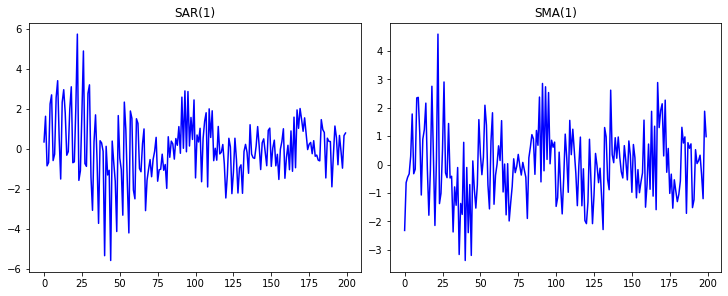

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4), constrained_layout=True)

ax1.set(title='SAR(1)')
ax1.plot(sar_1,'b-')

ax2.set(title='SMA(1)')
ax2.plot(sma_1, 'b-')

plt.show()

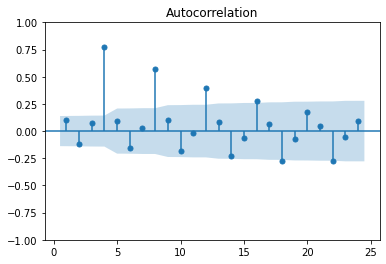

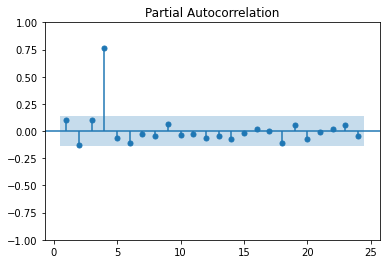

In [ ]:
sm.graphics.tsa.plot_acf(sar_1, zero = False)
sm.graphics.tsa.plot_pacf(sar_1, method = 'ywm', zero = False)
plt.show()

In [ ]:
mod_4 = sm.tsa.statespace.SARIMAX(sar_1, trend='n', order=(0,0,0), seasonal_order=(1,0,0,4))
res_4 = mod_4.fit(disp = False)
print(res_4.summary())

                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                  200
Model:             SARIMAX(1, 0, 0, 4)   Log Likelihood                -286.107
Date:                 Wed, 15 Mar 2023   AIC                            576.213
Time:                         12:00:07   BIC                            582.810
Sample:                              0   HQIC                           578.883
                                 - 200                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.7633      0.044     17.440      0.000       0.677       0.849
sigma2         1.0057      0.108      9.319      0.000       0.794       1.217
Ljung-Box (L1) (Q):                   2.04  

In [ ]:
ARMA(p,q) SARMA(P,Q)

http://alkaline-ml.com/pmdarima/modules/classes.html

In [ ]:
mod_5 = pm.auto_arima(sar_1, seasonal=True, m=4, d=0, D=0, max_p=2, max_q=2, suppress_warnings=True, trace = True)
print(mod_5.summary())

Выпишите полученную модель

In [ ]:
mod_6 = pm.auto_arima(sma_1, seasonal=True, m=4, d=0, D=0, start_p=0, start_q=0, max_p=1, max_q=1, max_P = 1, 
                      max_Q = 1, suppress_warnings=True,
                      trace = True, return_valid_fits = True)
for mod in mod_6:
    print(mod.summary())

### Рассмотрите данные об объемах производства водки и ликеро-водочных изделий в РФ, приведенные в файле vodka_russia.csv

In [ ]:
data = pd.read_csv('vodka_russia.csv')
data.head()

,obs,VODKA
0,1999M01,9.2
1,1999M02,9.9
2,1999M03,11.2
3,1999M04,11.0
4,1999M05,9.9


In [ ]:
data['obs'] = pd.to_datetime(data['obs'], format = '%Y' + 'M' + '%m')
data = data.set_index('obs')
data.head()

,VODKA
obs,
1999-01-01,9.2
1999-02-01,9.9
1999-03-01,11.2
1999-04-01,11.0
1999-05-01,9.9


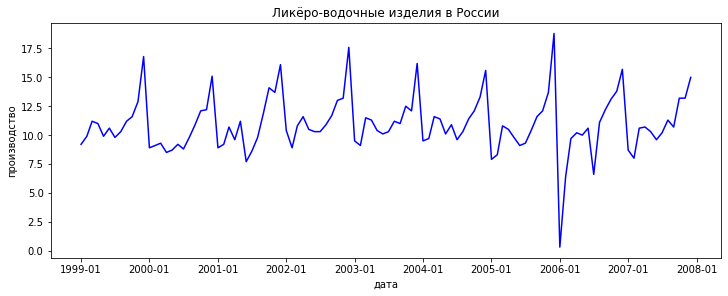

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Ликёро-водочные изделия в России')
ax.plot(data['VODKA'] ,'b-')

ax.xaxis_date()
ax.set_xlabel('дата')
ax.set_ylabel('производство')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.show()

In [ ]:
date_range = (data.index < '2004-01-01')
ts = data[date_range]

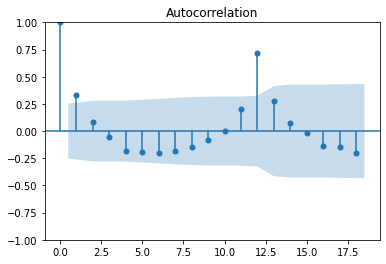

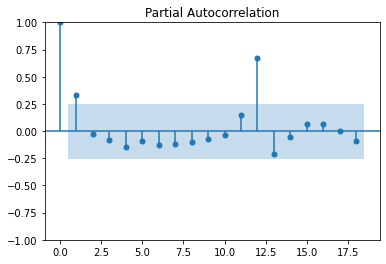

In [ ]:
sm.graphics.tsa.plot_acf(ts['VODKA'])
sm.graphics.tsa.plot_pacf(ts['VODKA'], method = 'ywm')
plt.show()

In [ ]:
sm.tsa.seasonal_decompose(ts['VODKA'], model='additive').plot()
sm.tsa.seasonal_decompose(ts['VODKA'], model='multiplicative').plot()
plt.show()

Как определить, мультипликативную модель попробовать или аддитивную?

Попробуем аддитивную модель

$x_t = a_1 x_{t-1} + a_{12} x_{t-12} + \varepsilon_t$

и мультипликативную модель

$(1 - a_1 L) (1 - a_{12} L) x_t = \varepsilon_t \to x_t = a_1 x_{t-1} + a_{12} x_{t-12} - a_1 a_{12} x_{t-13} + \varepsilon_t$


In [ ]:
mod_a = sm.tsa.statespace.SARIMAX(ts['VODKA'], trend='c', order=((1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1),0,0))
mod_m = sm.tsa.statespace.SARIMAX(ts['VODKA'], trend='c', order=(1,0,0), seasonal_order=(1,0,0,12))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(mod_a.fit(disp = False).summary())

                                 SARIMAX Results                                  
Dep. Variable:                      VODKA   No. Observations:                   60
Model:             SARIMAX([1, 12], 0, 0)   Log Likelihood                 -97.501
Date:                    Wed, 15 Mar 2023   AIC                            203.003
Time:                            12:27:36   BIC                            211.380
Sample:                        01-01-1999   HQIC                           206.279
                             - 12-01-2003                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1941      0.889      1.343      0.179      -0.549       2.937
ar.L1          0.0869      0.070      1.244      0.213      -0.050       0.224
ar.L12         0.806

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
results = mod_m.fit(disp = False)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VODKA   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                 -94.910
Date:                            Wed, 15 Mar 2023   AIC                            197.819
Time:                                    12:28:08   BIC                            206.197
Sample:                                01-01-1999   HQIC                           201.096
                                     - 12-01-2003                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1086      0.456      2.428      0.015       0.214       2.003
ar.L1          0.3343      0.118   

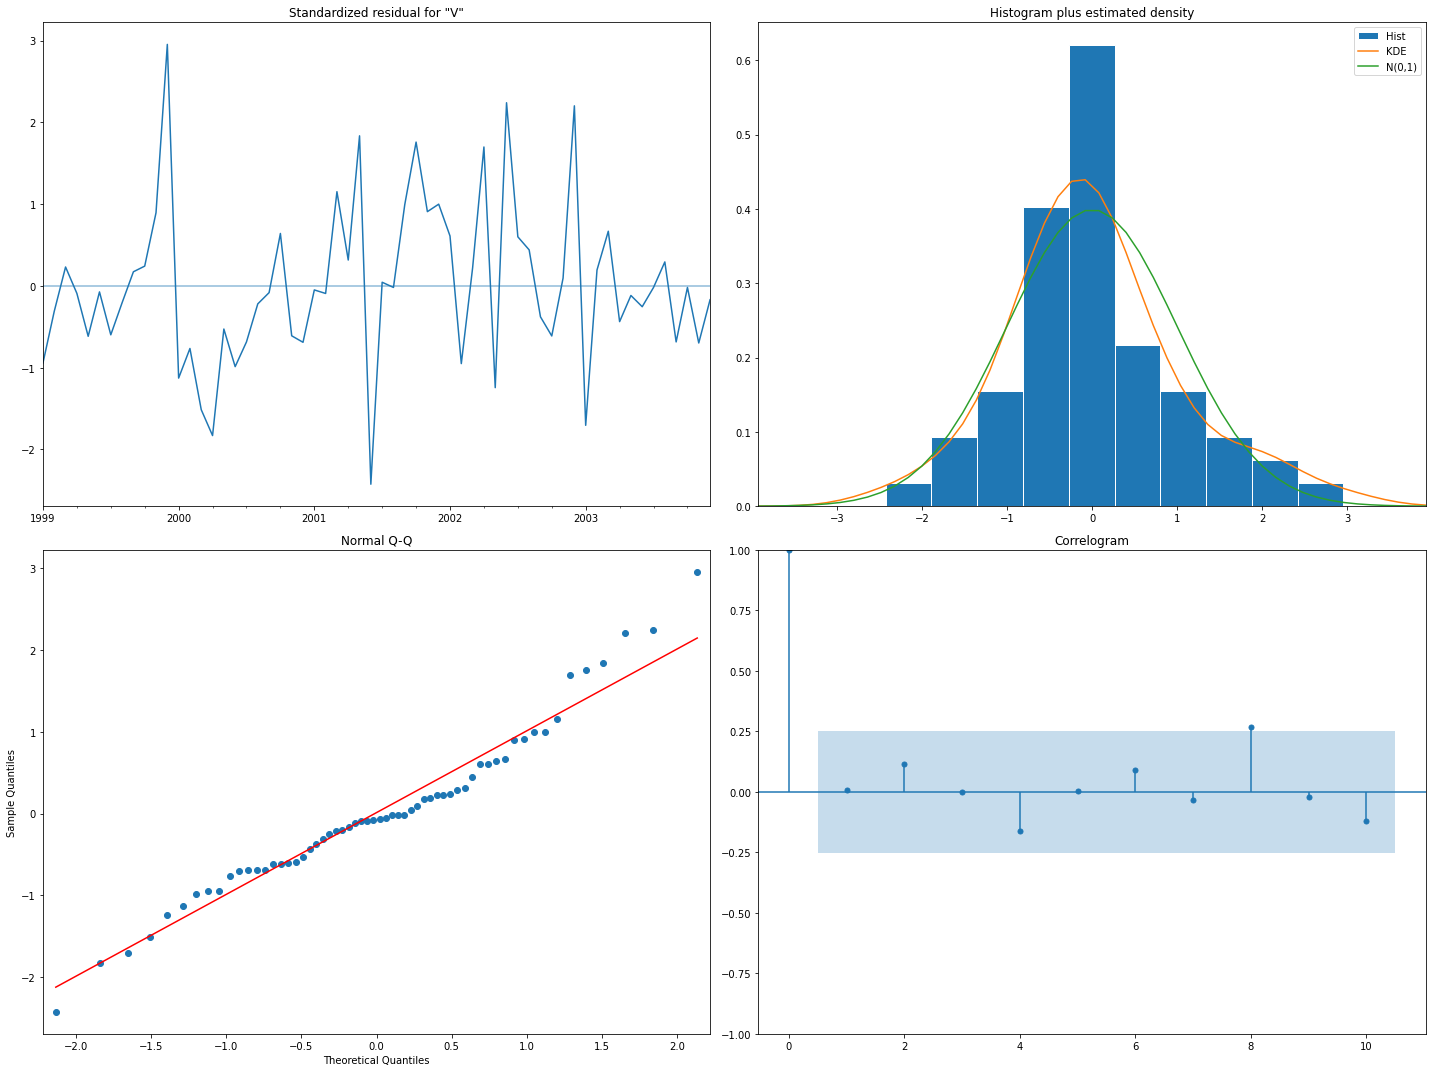

In [ ]:
results.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

Какая из двух моделей лучше? По какому критерию?

In [ ]:
models = pm.auto_arima(ts["VODKA"], seasonal=True, m=12, d=0, D=0, start_p=1, start_q=0, start_P=1, start_Q=0,
                      max_p=1, max_q=0,
                      max_P=24, max_Q=0,
                      suppress_warnings=True,
                      trace = True, return_valid_fits = True)
for mod in models:
    print(mod.summary())

Используя оценённую мультипликативную модель SAR(1)(1)12, постройте прогноз производства ликёроводочных изделий на 2004-2005 гг.

In [ ]:
forecast = results.get_forecast(24)

In [ ]:
data_1 = pd.concat([data, forecast.predicted_mean], axis=1)
data_1 = pd.concat([data_1, forecast.conf_int()], axis=1)

In [ ]:
data_1.head()

,VODKA,predicted_mean,lower X,upper X
1991-01-01,NaN,7.585584,5.972695,9.198473
1992-01-01,NaN,7.738834,6.002488,9.475180
1993-01-01,NaN,7.979965,6.237124,9.722805
1994-01-01,NaN,8.026299,6.136376,9.916223
1995-01-01,NaN,7.957787,5.974977,9.940597


KeyError: ignored

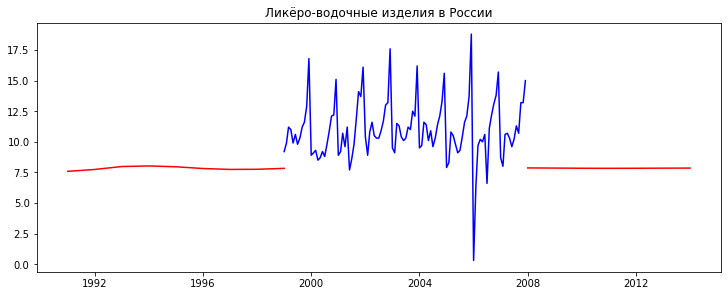

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Ликёро-водочные изделия в России')
ax.plot(data_1['VODKA'] ,'b-', label = 'actual')

ax.plot(data_1['predicted_mean'],'r-', label = 'forecast')
ax.fill_between(data_1.index, data_1['lower VODKA'], 
                 data_1['upper VODKA'], alpha=0.2, label = 'conf int')

ax.set_xlabel('дата')
ax.set_ylabel('производство')

ax.legend(loc = 'lower left')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.show()

In [ ]:
error = (data_1["VODKA"] - data_1["predicted_mean"]).dropna()

In [ ]:
R

Используя оценённую мультипликативную модель SAR(1)(1)12, постройте прогноз производства ликёроводочных изделий на 2004-2007 гг.

In [ ]:
forecast = results.get_forecast(48)
data_2 = pd.concat([data, forecast.predicted_mean], axis=1)
data_2 = pd.concat([data_2, forecast.conf_int()], axis=1)

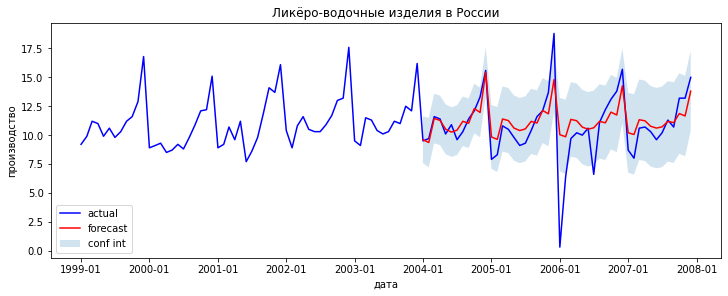

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Ликёро-водочные изделия в России')
ax.plot(data_2['VODKA'] ,'b-', label = 'actual')

ax.plot(data_2.loc[:,'predicted_mean'],'r-', label = 'forecast')
ax.fill_between(data_2.index, data_2.loc[:, 'lower VODKA'], 
                data_2.loc[:, 'upper VODKA'], alpha=0.2, label = 'conf int')

ax.set_xlabel('дата')
ax.set_ylabel('производство')

ax.legend(loc = 'lower left')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.show()

In [ ]:
error = (data_2["VODKA"] - data_2["predicted_mean"]).dropna()
RMSE = (np.mean(error**2))**0.5
RMSE

1.9658989485404694

#### Аддитивный ETS (Holt-Winters без тренда!)

$ \hat{y}_{t+h|t} = \ell_{t} + s_{t+h-m(k+1)}, k = [(h-1)/m] $

$  \ell_{t} = \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1}) $

$ s_{t} = \gamma (y_{t}-\ell_{t-1}) + (1-\gamma)s_{t-m}$

#### Мультипликативный ETS (Holt-Winters без тренда!)

$\hat{y}_{t+h|t} = \ell_{t}s_{t+h-m(k+1)} $

$ \ell_{t} = \alpha \frac{y_{t}}{s_{t-m}} + (1 - \alpha)\ell_{t-1}$

$s_{t} = \gamma \frac{y_{t}}{\ell_{t-1}} + (1 - \gamma)s_{t-m}$

In [ ]:
model_a = sm.tsa.ETSModel(ts["VODKA"])
fit_a = model_a.fit(disp = False)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
fit_a.aic

265.6254213106472

In [ ]:
model_m = sm.tsa.ETSModel(ts["VODKA"]???)
fit_m = model_m.fit(disp = False)

SyntaxError: ignored

In [ ]:
fit_m.aic

In [ ]:
forecast = fit_a.get_prediction(start = '2004', end = '2008').summary_frame(alpha=0.5)
forecast.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Ликёро-водочные изделия в России')
ax.plot(data['VODKA'] ,'b-', label = 'actual')

ax.plot(forecast.loc[:,'mean'],'r-', label = 'forecast')
ax.fill_between(forecast.index, forecast.loc[:, 'pi_lower'], 
                 forecast.loc[:, 'pi_upper'], alpha=0.2, label = 'conf int')

ax.set_xlabel('дата')
ax.set_ylabel('производство')

ax.legend(loc = 'lower left')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.show()

In [ ]:
error = (data["VODKA"] - forecast["mean"]).dropna()
RMSE = (np.mean(error**2))**0.5
RMSE

## Задача 17

Подбор стационарной модели ARMA для ряда наблюдений – объем продукции фирмы General Motors.

В файле general_motors.csv содержатся годовые данные о количестве произведенных всеми отделениями фирмы General Motors Corp транспортных средств (грузовиков, легковых машин и автобусов) в период с 1970 по 1992 годы.

In [ ]:
data = pd.read_csv('general_motors.csv')
data.head()

,obs,X
0,1970,5.3
1,1971,7.8
2,1972,7.8
3,1973,8.7
4,1974,6.7


In [ ]:
data['obs'] = pd.to_datetime(data['obs'], format = '%Y')
data = data.set_index('obs')
data.head()

,X
obs,
1970-01-01,5.3
1971-01-01,7.8
1972-01-01,7.8
1973-01-01,8.7
1974-01-01,6.7


#### 17.1 Ограничьте анализ ряда периодом с 1970 по 1990 год. Постройте график ряда. Похож ли он на график стационарного ряда? 

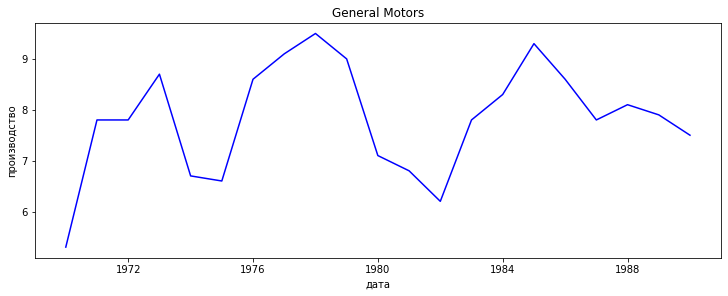

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='General Motors')
ax.plot(ts['X'] ,'b-')

ax.xaxis_date()
ax.set_xlabel('дата')
ax.set_ylabel('производство')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()

In [ ]:
date_range = (data.index < '1991')
ts = data[date_range]

#### 17.2 Посмотрите на коррелограмму ряда (графики и таблицу). Какая модель может соответствовать такой коррелограмме? Можно ли использовать для описания ряда модель авторегрессии – если можно, то какого порядка должна быть такая модель? 

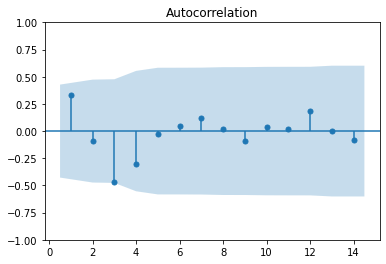

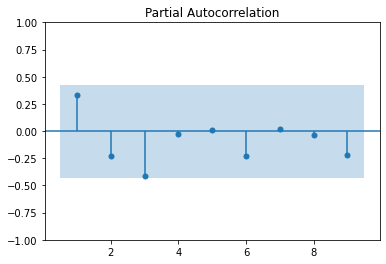

In [ ]:
sm.graphics.tsa.plot_acf(ts['X'], zero = False)
sm.graphics.tsa.plot_pacf(ts['X'], method = 'ywm', lags = 9, zero = False)
plt.show()

#### 17.3 Оцените соответствующую AR модель. Является ли оцененная модель стационарной?

In [ ]:
mod_ar = sm.tsa.statespace.SARIMAX(ts['X'], order=(3, 0, 0), trend = 'c')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
results = mod_ar.fit(disp = False)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      X   No. Observations:                   21
Model:               SARIMAX(3, 0, 0)   Log Likelihood                 -26.272
Date:                Wed, 22 Mar 2023   AIC                             62.544
Time:                        11:39:59   BIC                             67.767
Sample:                    01-01-1970   HQIC                            63.677
                         - 01-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.8745      3.147      2.820      0.005       2.707      15.042
ar.L1          0.3987      0.239      1.671      0.095      -0.069       0.866
ar.L2         -0.0657      0.253     -0.260      0.7

#### 17.4 Продиагностируйте оцененную модель. Обнаруживаются ли нарушения стандартных предположений об ошибках? 

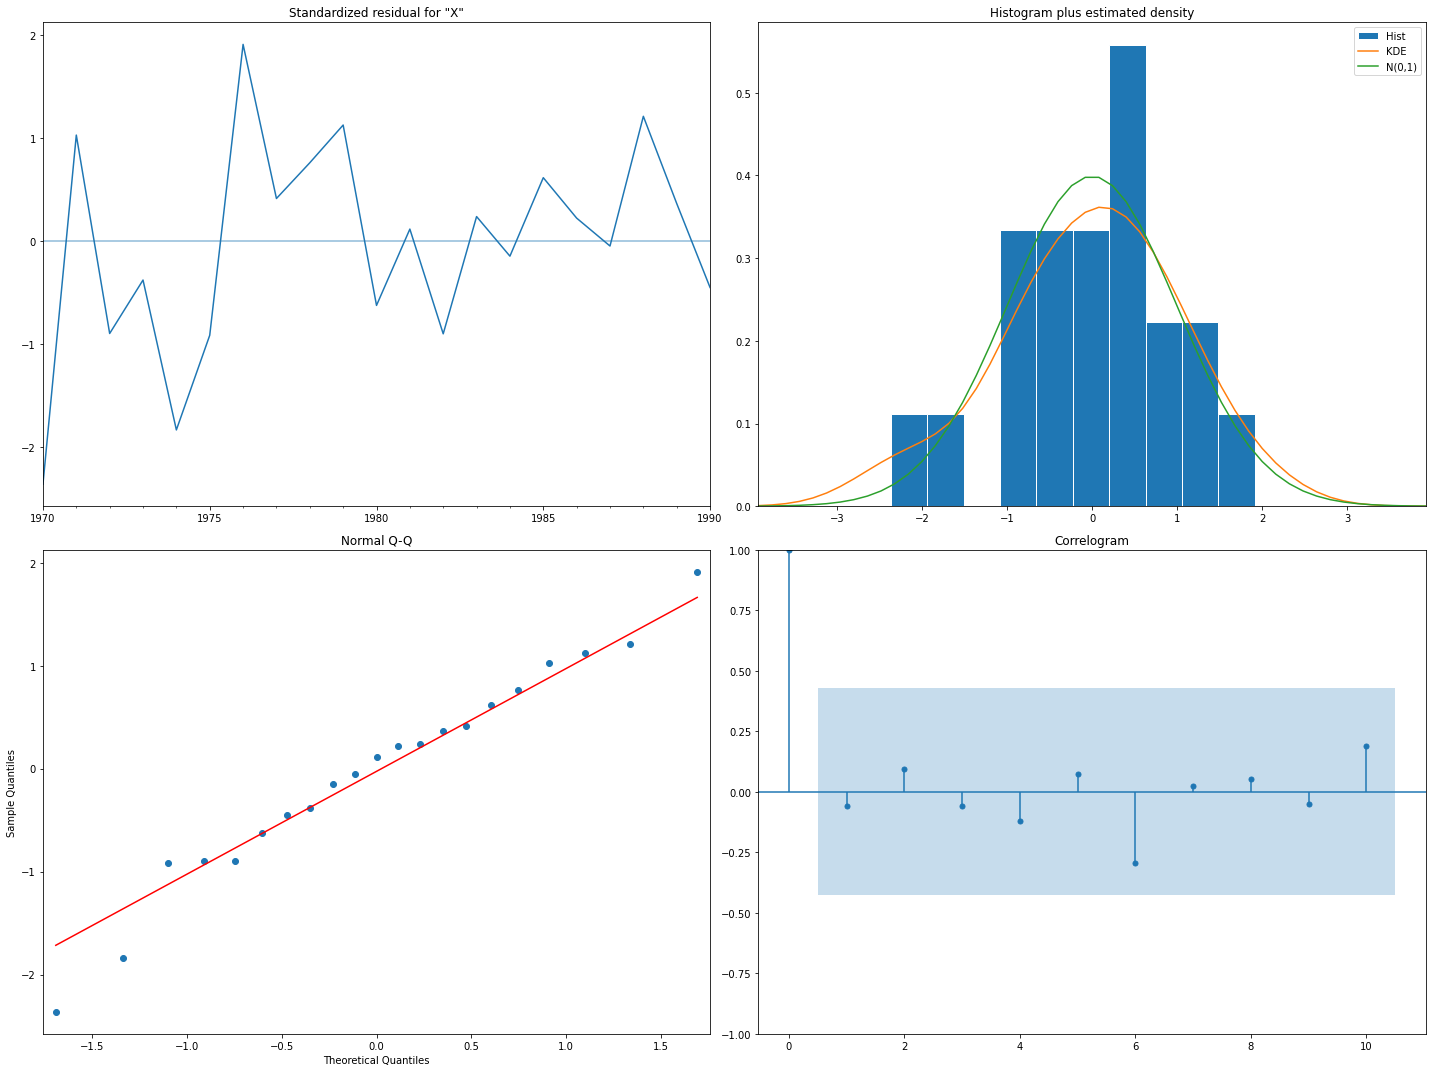

In [ ]:
results.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

In [ ]:
# statistic p-value skewness kurtosis
results.test_normality('jarquebera')

array([[ 0.53904205,  0.76374522, -0.39233268,  2.98133662]])

#### 17.5 Можно ли упростить модель, отказываясь от включения в правую часть уравнения некоторых запаздываний? Не приводит ли такое упрощение к нарушению стандартных предположений об ошибках или к нарушению стационарности модели?

In [ ]:
mod_ar = sm.tsa.statespace.SARIMAX(ts['X'], order = ((1, 0, 1), 0, 0), trend = "c")
results = mod_ar.fit(disp = False)
print(results.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:                         X   No. Observations:                   21
Model:             SARIMAX([1, 3], 0, 0)   Log Likelihood                 -26.307
Date:                   Wed, 22 Mar 2023   AIC                             60.614
Time:                           11:43:09   BIC                             64.792
Sample:                       01-01-1970   HQIC                            61.521
                            - 01-01-1990                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.8802      3.056      2.906      0.004       2.891      14.870
ar.L1          0.3668      0.205      1.791      0.073      -0.035       0.768
ar.L3         -0.4987      0

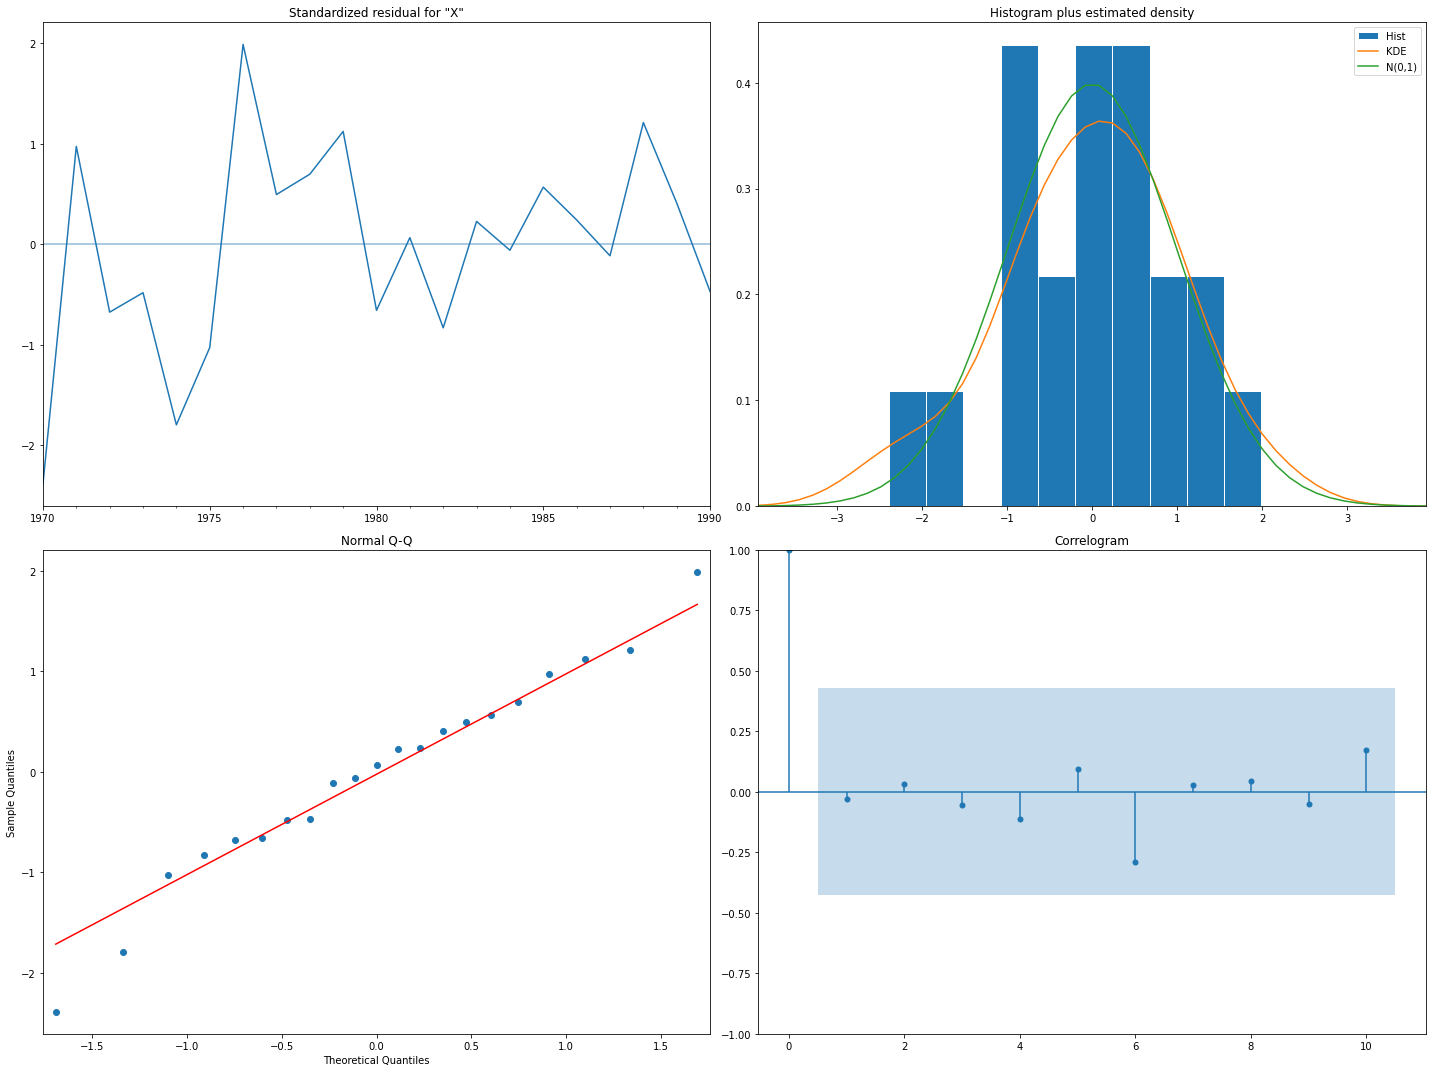

In [ ]:
results.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

In [ ]:
# statistic p-value skewness kurtosis
results.test_normality('jarquebera')

array([[ 0.47417878,  0.78892076, -0.36505596,  3.09410199]])

#### 17.6 Можно ли использовать для описания ряда модель скользящего среднего – если можно, то какого порядка должна быть модель? Оцените соответствующую МА модель, используя метод условного максимального правдоподобия. Является ли оцененная модель стационарной, является ли она обратимой?

In [ ]:
mod_ma = sm.tsa.statespace.SARIMAX(ts['X'], order = (0, 0, 2), trend = "c")

results_2 = mod_ma.fit(disp = False)
print(results_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      X   No. Observations:                   21
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 -27.458
Date:                Wed, 22 Mar 2023   AIC                             62.916
Time:                        11:52:54   BIC                             67.094
Sample:                    01-01-1970   HQIC                            63.823
                         - 01-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.6949      0.418     18.401      0.000       6.875       8.515
ma.L1          0.6566      0.264      2.485      0.013       0.139       1.174
ma.L2          0.5941      0.359      1.653      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
results_2.maroots

array([-0.5526333-1.17384229j, -0.5526333+1.17384229j])

#### 17.7 Если представляются подходящими более одной модели, сравните альтернативные модели, используя информационные критерии, и выберите “наилучшую” модель.

In [ ]:
models = pm.auto_arima(ts["X"], d=0, D=0, start_p=0, start_q=0,
                      max_p=3, max_q=3,
                      suppress_warnings=True,
                      trace = True, return_valid_fits = True)
for mod in models:
    print(mod.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=66.159, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.773, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64.432, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.431, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=65.993, Time=0.47 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=62.916, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=64.873, Time=0.48 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=112.156, Time=0.25 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 4.631 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 -27.458
Date:  

#### 17.8 По выбранной вами модели постройте динамический прогноз на 1991 и 1992 годы на основании данных за период 1970-1990 гг. Сравните прогнозные и реальные значения. Рассмотрите характеристики качества прогноза.

In [ ]:
forecast = results.get_forecast(2)
prediction = results.get_prediction()

data_2 = pd.concat([data, forecast.predicted_mean, forecast.conf_int()], axis=1)
data_2.loc[ts.index, 'predicted_mean'] = prediction.predicted_mean

error = (data_2["X"] - forecast.predicted_mean).dropna()
RMSE = (np.mean(error**2))**0.5
RMSE

0.5585460428159676

In [ ]:
forecast = results_2.get_forecast(2)
prediction = results_2.get_prediction()

data_3 = pd.concat([data, forecast.predicted_mean, forecast.conf_int()], axis=1)
data_3.loc[ts.index, 'predicted_mean'] = prediction.predicted_mean

error = (data_3["X"] - forecast.predicted_mean).dropna()
RMSE = (np.mean(error**2))**0.5
RMSE

0.552229923241383

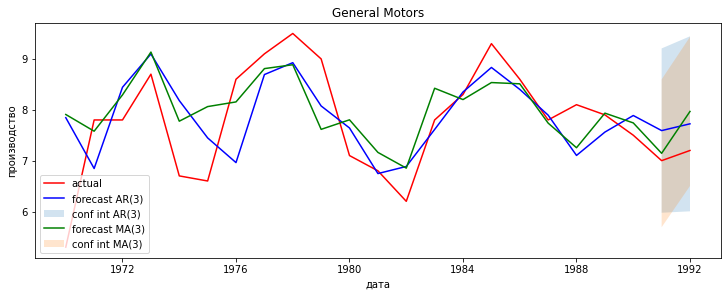

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='General Motors')
ax.plot(data_2['X'] ,'r-', label = 'actual')

ax.plot(data_2.loc[:,'predicted_mean'],'b-', label = 'forecast AR(3)')
ax.fill_between(data_2.index, data_2.loc[:, 'lower X'], 
                data_2.loc[:, 'upper X'], alpha=0.2, label = 'conf int AR(3)')

ax.plot(data_3.loc[:,'predicted_mean'],'g-', label = 'forecast MA(3)')
ax.fill_between(data_3.index, data_3.loc[:, 'lower X'], 
                data_3.loc[:, 'upper X'], alpha=0.2, label = 'conf int MA(3)')

ax.set_xlabel('дата')
ax.set_ylabel('производство')

ax.legend(loc = 'lower left')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()